## Import Libraries

In [33]:
import pandas as pd 
import numpy as np 

## Read Dataset

In [34]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Data Preprocessing

In [35]:
# find null values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [37]:
# find duplicates 
df_dup = df.duplicated().any()

In [38]:
df_dup

True

In [39]:
df = df.drop_duplicates()

In [40]:
df_dup = df.duplicated().any()

In [41]:
df_dup

False

In [42]:
# separate categorical and numerical colums 
cat_val = []
num_val = []

for column in df.columns :
    if df[column].nunique() <=10:
        cat_val.append(column)
    else:
        num_val.append(column)
        
    

In [43]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [44]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## apply feature encoding for categorical columns

In [45]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [46]:
df['sex'].unique()

array([1, 0], dtype=int64)

In [47]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [48]:
df['fbs'].unique()

array([0, 1], dtype=int64)

In [49]:
df['restecg'].unique()

array([1, 0, 2], dtype=int64)

In [50]:
df['exang'].unique()

array([0, 1], dtype=int64)

In [51]:
df['slope'].unique()

array([2, 0, 1], dtype=int64)

In [52]:
df['ca'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [53]:
df['thal'].unique()

array([3, 2, 1, 0], dtype=int64)

In [54]:
df['target'].unique()

array([0, 1], dtype=int64)

In [55]:
cat_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [56]:
cat_val.remove('sex')

In [57]:
cat_val.remove('target')

In [58]:
df = pd.get_dummies(df, columns=cat_val, drop_first=True)

In [59]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [60]:
df.shape

(302, 23)

## Apply feature scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
sc = StandardScaler()
df[num_val] = sc.fit_transform(df[num_val])

In [64]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [69]:
# save cleaned data
df.to_csv('clean_heart.csv')

## Training and Testing of Dataset

In [65]:
x = df.drop('target', axis=1)

In [66]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [67]:
y = df['target']

In [68]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [71]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [72]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

## A) Apply linear classification algorithms 

### 1. Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred1 = lr.predict(X_test)

In [77]:
# determine accuracy
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

### 2. SVM Classifier

In [79]:
from sklearn import svm

In [80]:
svm = svm.SVC()

In [81]:
svm.fit(X_train, y_train)

SVC()

In [83]:
y_pred2 = svm.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

### 3. KNeighbors Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [88]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [89]:
y_pred3 = knn.predict(X_test)

In [90]:
accuracy_score(y_test, y_pred3)

0.7377049180327869

### B) Apply non-linear classification algorithms

In [93]:
data = pd.read_csv('heart.csv')

In [94]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [97]:
data = data.drop_duplicates()

In [123]:
data.to_csv('clean_heart_2.csv')

In [98]:
data.shape

(302, 14)

In [99]:
x = data.drop('target', axis=1)

In [100]:
y = data['target']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### 1. Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt = DecisionTreeClassifier()

In [105]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
y_pred4 = dt.predict(X_test)

In [107]:
accuracy_score(y_test, y_pred4)

0.7049180327868853

### 2. Random Forest Classifier

In [108]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf = RandomForestClassifier()

In [113]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [115]:
y_pred5 = rf.predict(X_test)

In [116]:
accuracy_score(y_test, y_pred5)

0.8360655737704918

### 3. Gradient Boosting Classifier

In [117]:
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
gb = GradientBoostingClassifier()

In [120]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [121]:
y_pred6 = gb.predict(X_test)

In [122]:
accuracy_score(y_test, y_pred6)

0.8032786885245902

In [126]:
final_data = pd.DataFrame({'Models':['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
                          'ACC':[accuracy_score(y_test, y_pred1), 
                                accuracy_score(y_test, y_pred2),
                                accuracy_score(y_test, y_pred3),
                                accuracy_score(y_test, y_pred4),
                                accuracy_score(y_test, y_pred5),
                                accuracy_score(y_test, y_pred6)]})

In [127]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.704918
4,RF,0.836066
5,GB,0.803279


In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Models', ylabel='ACC'>

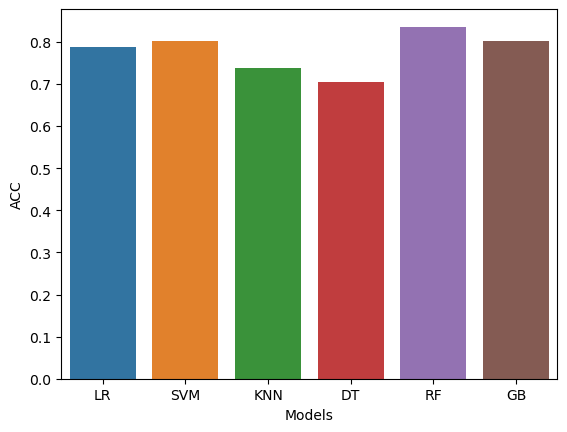

In [131]:
sns.barplot(x='Models', y='ACC', data=final_data)

In [134]:
import pickle
from sklearn.pipeline import make_pipeline

In [136]:
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)